Task 2

Перші 5 рядків датасету:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Результати моделювання:
Середня помилка (MAE): 4213.80 (доларів)
Точність (R2 Score): 0.78


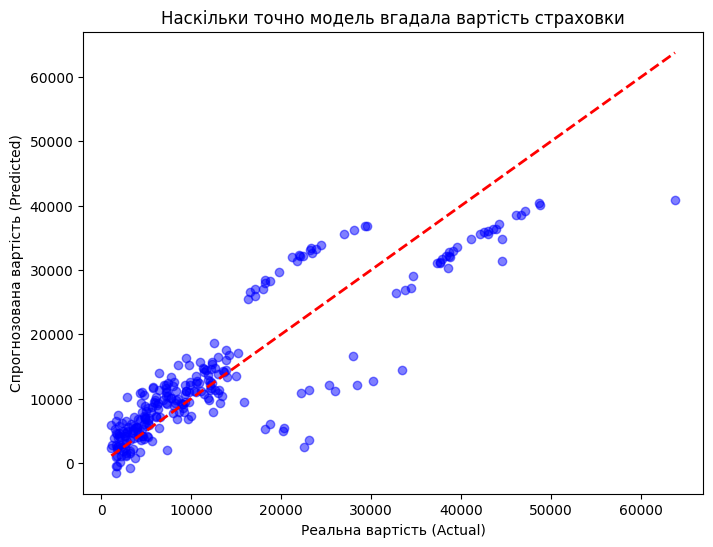

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('insurance.csv')

print("Перші 5 рядків датасету:")
print(df.head())

df['smoker_num'] = df['smoker'].map({'yes': 1, 'no': 0})

X = df[['age', 'bmi', 'children', 'smoker_num']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nРезультати моделювання:")
print(f"Середня помилка (MAE): {mae:.2f} (доларів)")
print(f"Точність (R2 Score): {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальна вартість (Actual)')
plt.ylabel('Спрогнозована вартість (Predicted)')
plt.title('Наскільки точно модель вгадала вартість страховки')
plt.show()